## Importing libraries

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Data Processing

### Training Image Processing 

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    
)

Found 989 files belonging to 10 classes.


In [49]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    
)

Found 989 files belonging to 10 classes.


In [51]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [50]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 1.00000000e+00 1.00000000e+00]
   ...
   [2.18125000e+01 2.18125000e+01 2.18125000e+01]
   [1.66875000e+01 1.66875000e+01 1.66875000e+01]
   [1.20000000e+01 1.20000000e+01 1.20000000e+01]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [2.00000000e+01 2.00000000e+01 2.00000000e+01]
   [1.46875000e+01 1.46875000e+01 1.46875000e+01]
   [1.05625000e+01 1.05625000e+01 1.05625000e+01]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [1.60000000e+01 1.60000000e+01 1.60000000e+01]
   [1.06875000e+01 1.06875000e+01 1.06875000e+01]
   [7.56250000e+00 7.56250000e+00 7.56250000e+00]]

  ...

  [[2.40000000e+01 2.40000000e+01 2.40000000e+01]
   [3

## Building Model

In [52]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential





In [53]:
model = Sequential()


In [54]:
model.add(Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu", input_shape = [128,128,3]))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu",))
model.add(MaxPool2D(pool_size=2, strides = 2))




In [55]:
model.add(Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu", input_shape = [128,128,3]))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu",))
model.add(MaxPool2D(pool_size=2, strides = 2))



In [56]:
model.add(Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu", input_shape = [128,128,3]))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu",))
model.add(MaxPool2D(pool_size=2, strides = 2))

In [57]:
model.add(Flatten())

In [58]:
model.add(Dense(units=1024,activation="relu"))

In [59]:
#output layer

model.add(Dense(units = 10, activation="softmax"))

## Compliing Model

In [60]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1024)                │      33,555,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,852,714 (129.14 MB)

 Trainable params: 33,852,714 (129.14 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [64]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=20)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 30s 969ms/step - accuracy: 0.6699 - loss: 0.9391 - val_accuracy: 0.6542 - val_loss: 1.0995
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6322 - loss: 1.0904 - val_accuracy: 0.7361 - val_loss: 0.8211
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 30s 950ms/step - accuracy: 0.7270 - loss: 0.8249 - val_accuracy: 0.7958 - val_loss: 0.6241
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 29s 945ms/step - accuracy: 0.7783 - loss: 0.8016 - val_accuracy: 0.8362 - val_loss: 0.5423
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8139 - loss: 0.6345 - val_accuracy: 0.8514 - val_loss: 0.5315
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8111 - loss: 0.6938 - val_accuracy: 0.8736 - val_loss: 0.4629
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8577 - loss: 0.4695 - val_accuracy: 0.8918 - val_loss: 0.3754
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8851 - loss: 0.4146 - val_accuracy: 0.9050 - 

## Model Evaluation

In [65]:
train_loss,train_acc = model.evaluate(training_set)

31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.9897 - loss: 0.0492


In [66]:
val_loss,val_acc = model.evaluate(validation_set)

31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.9913 - loss: 0.0351


## Saving model

In [69]:
model.save("trained_model.keras")

In [71]:
training_history.history

{'accuracy': [0.656218409538269,
  0.647118330001831,
  0.7371081709861755,
  0.7947421669960022,
  0.8119312524795532,
  0.8038422465324402,
  0.8645095825195312,
  0.8857432007789612,
  0.8645095825195312,
  0.8857432007789612,
  0.8614762425422668,
  0.9100100994110107,
  0.9352881908416748,
  0.9383215308189392,
  0.9534883499145508,
  0.9615773558616638,
  0.9676440954208374,
  0.9544994831085205,
  0.9696663022041321,
  0.9868553876876831],
 'loss': [1.052761197090149,
  1.0569792985916138,
  0.7813372611999512,
  0.7296466827392578,
  0.6196247935295105,
  0.6330810189247131,
  0.4498465657234192,
  0.42084065079689026,
  0.5266900658607483,
  0.3629129230976105,
  0.4738985002040863,
  0.3562905788421631,
  0.2503005862236023,
  0.2358347326517105,
  0.1642724573612213,
  0.15874166786670685,
  0.11470010131597519,
  0.25891491770744324,
  0.09803179651498795,
  0.08031602203845978],
 'val_accuracy': [0.6541961431503296,
  0.7360970973968506,
  0.7957533001899719,
  0.836198151

In [73]:
training_history.history['accuracy']

[0.656218409538269,
 0.647118330001831,
 0.7371081709861755,
 0.7947421669960022,
 0.8119312524795532,
 0.8038422465324402,
 0.8645095825195312,
 0.8857432007789612,
 0.8645095825195312,
 0.8857432007789612,
 0.8614762425422668,
 0.9100100994110107,
 0.9352881908416748,
 0.9383215308189392,
 0.9534883499145508,
 0.9615773558616638,
 0.9676440954208374,
 0.9544994831085205,
 0.9696663022041321,
 0.9868553876876831]

In [77]:
training_history.history['val_accuracy']

[0.6541961431503296,
 0.7360970973968506,
 0.7957533001899719,
 0.8361981511116028,
 0.8513650298118591,
 0.873609721660614,
 0.89180988073349,
 0.9049544930458069,
 0.9130434989929199,
 0.9120323657989502,
 0.9120323657989502,
 0.9474216103553772,
 0.9362992644309998,
 0.9716885685920715,
 0.9646106958389282,
 0.973710834980011,
 0.9716885685920715,
 0.9747219681739807,
 0.9817997813224792,
 0.9898887872695923]

## Accuracy Visualization

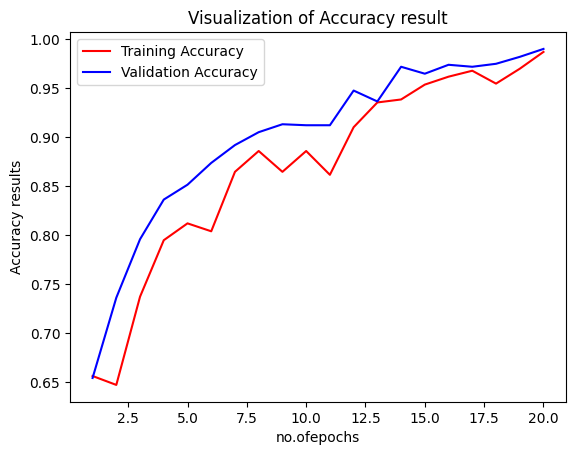

In [86]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')

plt.xlabel("no.ofepochs")
plt.ylabel("Accuracy results")
plt.title("Visualization of Accuracy result")
plt.legend()
plt.show()

## Some other metrics for model Evaluation

In [90]:
class_name  = validation_set.class_names
class_name

['Avulsion fracture',
 'Comminuted fracture',
 'Fracture Dislocation',
 'Greenstick fracture',
 'Hairline Fracture',
 'Impacted fracture',
 'Longitudinal fracture',
 'Oblique fracture',
 'Pathological fracture',
 'Spiral Fracture']

In [91]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    
)

Found 989 files belonging to 10 classes.


In [93]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step


(array([[9.9899763e-01, 6.9810063e-05, 2.3852681e-06, ..., 1.4183372e-05,
         4.7415127e-05, 1.7219803e-07],
        [9.9916887e-01, 7.0543529e-04, 2.9293553e-06, ..., 7.1766340e-07,
         1.3199888e-06, 1.2036332e-06],
        [9.9939036e-01, 3.8222357e-04, 1.4166244e-07, ..., 6.0951428e-05,
         6.1959174e-05, 6.7382265e-05],
        ...,
        [1.0763620e-06, 8.1289891e-06, 1.8529027e-09, ..., 7.4405449e-08,
         3.3171887e-07, 9.9995005e-01],
        [4.4070430e-07, 2.9439791e-06, 6.2905188e-13, ..., 5.7831917e-10,
         1.3499640e-06, 9.9999404e-01],
        [7.5394775e-23, 1.6442964e-19, 6.5862959e-22, ..., 4.3461993e-18,
         4.1290430e-14, 1.0000000e+00]], dtype=float32),
 (989, 10))

In [94]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [95]:
predicted_categories

<tf.Tensor: shape=(989,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [96]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(989, 10), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [97]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(989,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [102]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_true,predicted_categories,target_names= class_name))

                       precision    recall  f1-score   support

    Avulsion fracture       0.98      1.00      0.99       109
  Comminuted fracture       0.99      1.00      1.00       134
 Fracture Dislocation       1.00      0.99      1.00       137
  Greenstick fracture       0.97      0.98      0.98       106
    Hairline Fracture       1.00      1.00      1.00       101
    Impacted fracture       0.97      0.99      0.98        75
Longitudinal fracture       1.00      0.99      0.99        68
     Oblique fracture       1.00      1.00      1.00        69
Pathological fracture       1.00      0.97      0.99       116
      Spiral Fracture       0.97      0.97      0.97        74

             accuracy                           0.99       989
            macro avg       0.99      0.99      0.99       989
         weighted avg       0.99      0.99      0.99       989



In [103]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(10, 10)

## Confusion Matrix Visualization

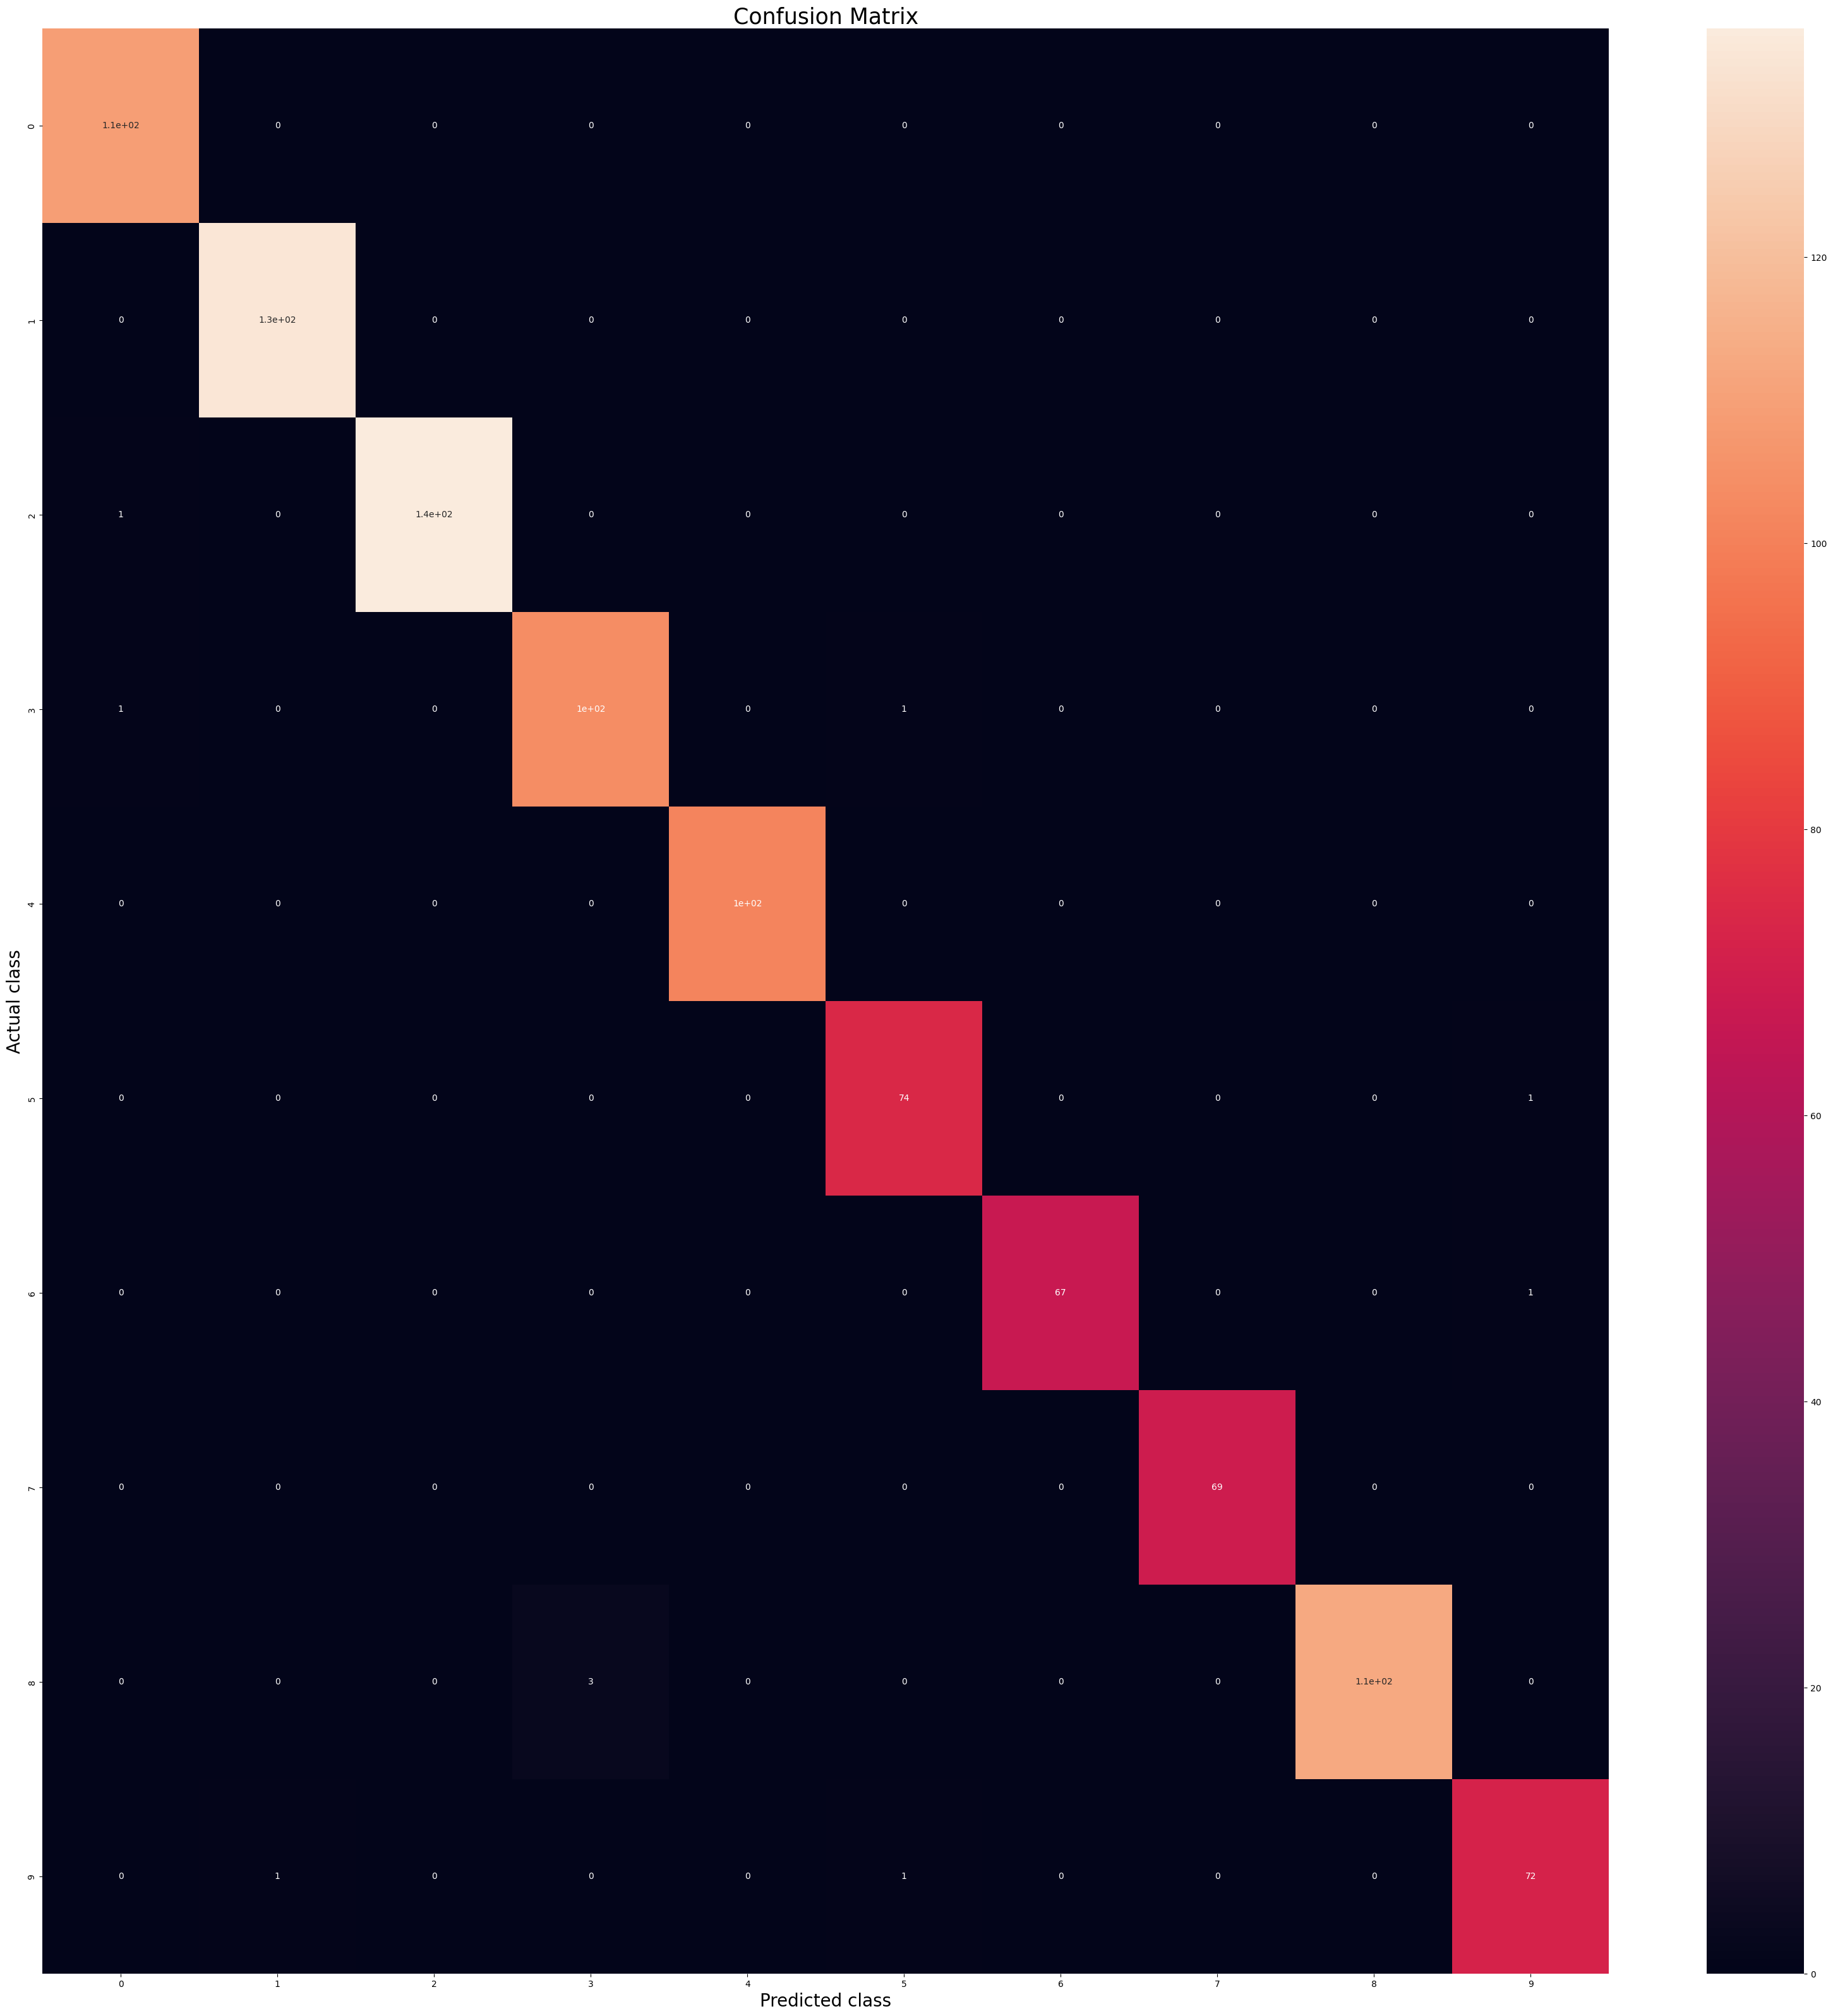

In [111]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted class",fontsize=20)
plt.ylabel("Actual class",fontsize=20)
plt.title("Confusion Matrix",fontsize=25)
plt.show()
